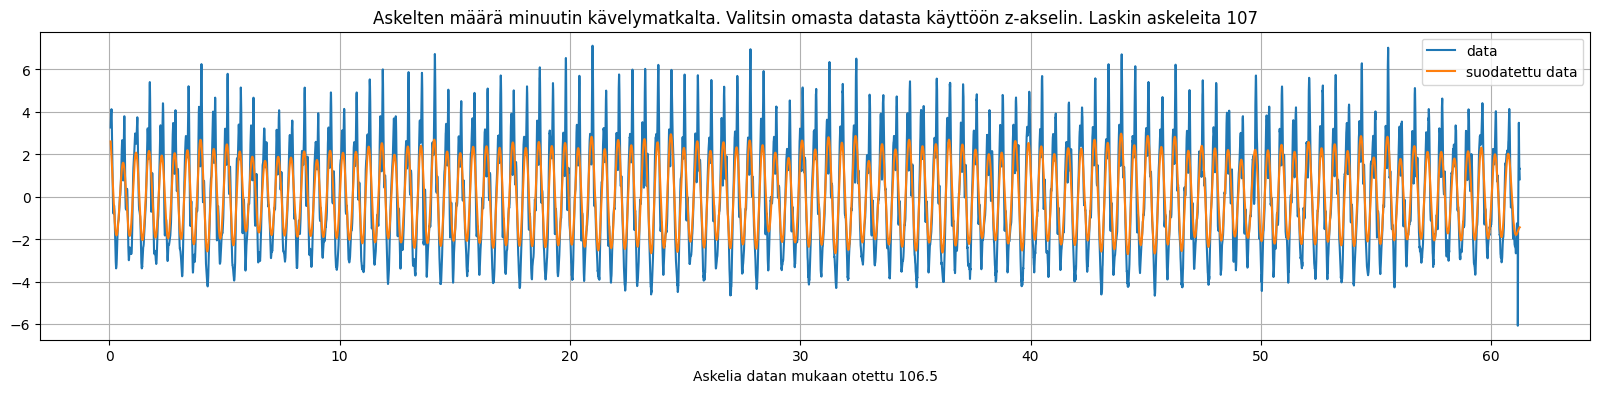

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

df = pd.read_csv("./askeldata/rawdata.csv")

time = df["Time (s)"]
ax = df["Linear Acceleration x (m/s^2)"]
ay = df["Linear Acceleration y (m/s^2)"]
az = df["Linear Acceleration z (m/s^2)"]
absolute = df["Absolute acceleration (m/s^2)"]

from scipy.signal import butter,filtfilt
def butter_lowpass_filter(data, cutoff, nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff,  nyq, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

data = df['Linear Acceleration z (m/s^2)']
T_tot = df['Time (s)'].max()
n = len(df['Time (s)']) 
fs = n/T_tot
nyq = fs/2 
order = 3
cutoff = 1/0.5

data_filt = butter_lowpass_filter(data, cutoff, nyq, order)

#Piirretään kuvaa, jossa alkuperäinen ja suodatettu signaali
fig = plt.figure(figsize=(20,4))
plt.plot(df['Time (s)'],data,label = 'data')
plt.plot(df['Time (s)'],data_filt,label = 'suodatettu data')
#plt.axis([0,8,-3,3])
plt.grid()
plt.legend()


jaksot = 0
for i in range(n-1):
    if data_filt[i]/data_filt[i+1] < 0:
        jaksot = jaksot + 1/2
askeleet = f'Askelia datan mukaan otettu {jaksot}'
plt.title('Askelten määrä minuutin kävelymatkalta. Valitsin omasta datasta käyttöön z-akselin. Laskin askeleita 107')
plt.xlabel(askeleet)

pdf_name = "askelmittari.pdf"
with PdfPages(pdf_name) as pdf:
    pdf.savefig(fig, bbox_inches="tight")

plt.show()
